# Tic-Tac-Toe Endgame
### Binary classification task on possible configurations of tic-tac-toe game
<br>

## Data Set Information:
This database encodes the complete set of possible board configurations at the end of tic-tac-toe games, where "x" is assumed to have played first. The target concept is "win for x" (i.e., true when "x" has one of 8 possible ways to create a "three-in-a-row").

## Attribute Information:
1. top-left-square: {x,o,b}
2. top-middle-square: {x,o,b}
3. top-right-square: {x,o,b}
4. middle-left-square: {x,o,b}
5. middle-middle-square: {x,o,b}
6. middle-right-square: {x,o,b}
7. bottom-left-square: {x,o,b}
8. bottom-middle-square: {x,o,b}
9. bottom-right-square: {x,o,b}
10. Class: {positive,negative}

In [12]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [4]:
# Read the dataset
df = pd.read_csv('Dataset/tic-tac-toe-endgame.csv')
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10
0,x,x,x,x,o,o,x,o,o,positive
1,x,x,x,x,o,o,o,x,o,positive
2,x,x,x,x,o,o,o,o,x,positive
3,x,x,x,x,o,o,o,b,b,positive
4,x,x,x,x,o,o,b,o,b,positive


# Exploratory Data Analysis

In [5]:
# Check info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 958 entries, 0 to 957
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   V1      958 non-null    object
 1   V2      958 non-null    object
 2   V3      958 non-null    object
 3   V4      958 non-null    object
 4   V5      958 non-null    object
 5   V6      958 non-null    object
 6   V7      958 non-null    object
 7   V8      958 non-null    object
 8   V9      958 non-null    object
 9   V10     958 non-null    object
dtypes: object(10)
memory usage: 75.0+ KB


958 records are present in the dataset

In [6]:
# Check for missing values
df.isnull().sum()

V1     0
V2     0
V3     0
V4     0
V5     0
V6     0
V7     0
V8     0
V9     0
V10    0
dtype: int64

There are no null values

In [7]:
# Check for duplicate values
df.duplicated().sum()

0

No duplicate records are present

In [8]:
# Count the number of unique values in each column
df.nunique()

V1     3
V2     3
V3     3
V4     3
V5     3
V6     3
V7     3
V8     3
V9     3
V10    2
dtype: int64

Each attribute has 3 unique vales expect the last i.e. the target column that has 2 unique values: win (positive) or loose (negative).

<AxesSubplot:xlabel='V10', ylabel='count'>

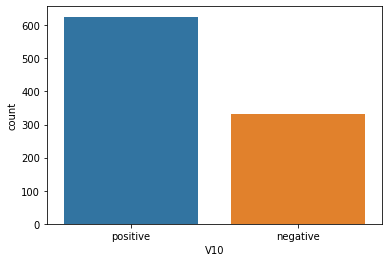

In [9]:
# Count plot for V10 (Winner)
sns.countplot(x='V10', data=df)

Player has won ~2x number of games than he lost.

# Preprocess the dataset before training

In [10]:
# Convert categorical variables to numeric
df['V10'] = df['V10'].astype('category').cat.codes

# Factorise categorical variables
df['V1'] = df['V1'].astype('category').cat.codes
df['V2'] = df['V2'].astype('category').cat.codes
df['V3'] = df['V3'].astype('category').cat.codes
df['V4'] = df['V4'].astype('category').cat.codes
df['V5'] = df['V5'].astype('category').cat.codes
df['V6'] = df['V6'].astype('category').cat.codes
df['V7'] = df['V7'].astype('category').cat.codes
df['V8'] = df['V8'].astype('category').cat.codes
df['V9'] = df['V9'].astype('category').cat.codes

In [11]:
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10
0,2,2,2,2,1,1,2,1,1,1
1,2,2,2,2,1,1,1,2,1,1
2,2,2,2,2,1,1,1,1,2,1
3,2,2,2,2,1,1,1,0,0,1
4,2,2,2,2,1,1,0,1,0,1


# Train Test Split

In [13]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)